# Point Mass Systems

This sub-project has as goal to develop mass-spring-damper models for vibrating doors in driving busses. The door will be assumed to be a point mass or a set of interconnected point masses. In the latter case, the point masses with be interconnected by spring anfd dampers (dashpots). The single point masses are assumed to have <b>no</b> physical dimnensions. These models are expected to act as a guide (reference, provide indications, rough estimates) in developing more detailed structural analysis and flexible multi-body dynamics models. 

## Import Packages

In [2]:
using Pkg
Pkg.add("DifferentialEquations")

    Updating registry at `~/.julia/registries/General.toml`


   Resolving package versions...


  No Changes to `~/.julia/environments/v1.8/Project.toml`
  No Changes to `~/.julia/environments/v1.8/Manifest.toml`


In [3]:
Pkg.add("LinearAlgebra")

   Resolving package versions...


  No Changes to `~/.julia/environments/v1.8/Project.toml`
  No Changes to `~/.julia/environments/v1.8/Manifest.toml`


In [4]:
Pkg.add("SparseArrays")

   Resolving package versions...


  No Changes to `~/.julia/environments/v1.8/Project.toml`
  No Changes to `~/.julia/environments/v1.8/Manifest.toml`


In [5]:
Pkg.add("Plots")

   Resolving package versions...


  No Changes to `~/.julia/environments/v1.8/Project.toml`
  No Changes to `~/.julia/environments/v1.8/Manifest.toml`


In [6]:
Pkg.add("LaTeXStrings")

   Resolving package versions...


  No Changes to `~/.julia/environments/v1.8/Project.toml`
  No Changes to `~/.julia/environments/v1.8/Manifest.toml`


In [7]:
Pkg.add("BenchmarkTools")

   Resolving package versions...


  No Changes to `~/.julia/environments/v1.8/Project.toml`
  No Changes to `~/.julia/environments/v1.8/Manifest.toml`


In [8]:
using LinearAlgebra
using DifferentialEquations
using SparseArrays
using Plots
using LaTeXStrings
using BenchmarkTools 

Documentation of DifferentialEquations.jl  
<ul>
<li> <a href="https://diffeq.sciml.ai/dev/tutorials/ode_example/"> Examples as part of DifferentialEquations.jl </a>   
<li> <a href="https://diffeq.sciml.ai/stable/"> Documentation of DifferentialEquations.jl on Github </a>  
</ul>   

## Section 2/: Door as Single Point-Mass

In this section we simplify the door to be a point-mass (no dimensions). We imagine the point-mass to be attached to the bus via springs and dampers. We imagine the bus to drive (over various road conditions) and try to model (quantify) how the door will move accordingly. 

### Questions
- to do: plot the computed acceleration usng g"s as unit; 
- in time domain: how to imposes measured force (given as mass times acceleration (as a function in time) with acceleration measured in a number of g"s) as forcing function in the differential equation?  
- in Laplace domain: how to solve the same problem using Laplace transforms? Using PSDF of the recorded acceleration as forcing function? 

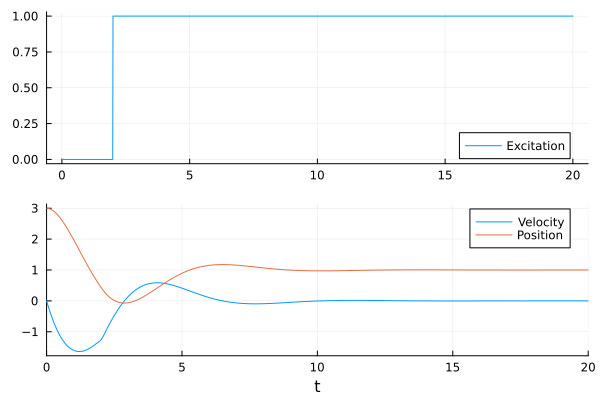

In [30]:
#..set mass of point mass 
m = 1 
#..set spring constant of spring 
k = 1.0 
#..set damping constant 
c = 1.0 

#..set imposed acceleration on the door 
function f(t)
    # return exp(-(t-2)^2/0.01)
    return t>=2 
    return 0
end 

#..define the right-hand side of the ordinary differential equation of the equation of motion 
function mass_system(du,u,p,t)
    # solve \ddot{u} = -(k/m) u - (c/m) \dot u + f(t) 
    ddu = -(k/m)*u - (c/m)*du + f(t)
end

function mass_system!(ddu,du,u,p,t)
    # solve \ddot{u} = -(k/m) u - (c/m) \dot u + f(t) 
    ddu = -(k/m)*u - (c/m)*du + f(t)
end

#..set initial position and velocity
u0 = 3.0                                      
v0 = 0.0 
#..set time begin and end forward
tspan = (0.0,20.0)               

#..define ODE problem to be solved  
prob = SecondOrderODEProblem(mass_system,v0,u0,tspan)

#..solve ODE problem 
sol = solve(prob)

#..plot the source term
tvec = Vector(0.:0.01:20.)
fvec = f.(tvec)
p1 = plot(tvec,fvec,label="Excitation")

#..plot solution of velocity and position as function of time  
plot(sol,vars=1,label="Velocity")
p2 = plot!(sol,vars=2,label="Position")

plot(p1,p2,layout=(2,1))

gamma: 0.15652475842498526;  w0: 2.23606797749979;  w: 2.2085062825357777

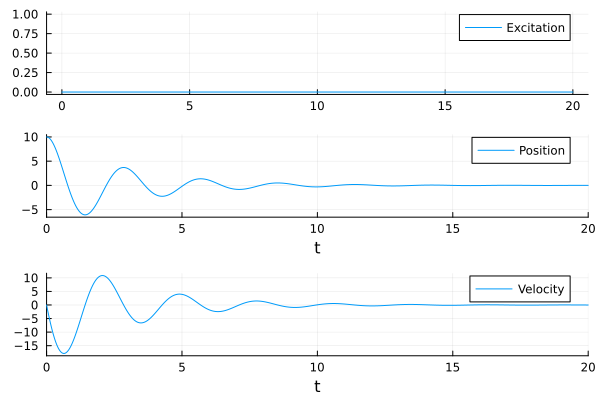

In [10]:
#..set mass of point mass 
m = 1 
#..set spring constant of spring 
k = 5.0 
#..set damping constant 
c = 0.7

gamma = c / (2 * sqrt(k*m))
print("gamma: ", gamma)
print(";  w0: ", sqrt(k/m))
print(";  w: ", sqrt(k/m)*sqrt(1-gamma^2))

#..set imposed acceleration on the door 
function f(t)
    # return exp(-(t-2)^2/0.01)
    # return t>=2 
    return 0
end 

#..define the right-hand side of the ordinary differential equation of the equation of motion 
# function mass_system(du,u,p,t)
#     # solve \ddot{u} = -(k/m) u - (c/m) \dot u + f(t) 
#     ddu = -(k/m)*u - (c/m)*du + f(t)
# end

function mass_system!(ddu,du,u,p,t)
    # solve \ddot{u} = -(k/m) u - (c/m) \dot u + f(t) 
    ddu = -(k/m)*u - (c/m)*du + f(t)
end


#..set initial position and velocity
u0 = 10.0                                      
v0 = 0.0 
#..set time begin and end forward

t0 = 0
tf = 20
dt = 0.01

tspan = (t0,tf)               

#..define ODE problem to be solved  
prob = SecondOrderODEProblem(mass_system,v0,u0,tspan)

#..solve ODE problem 
sol = solve(prob)

#..plot the source term
tvec = Vector(t0:dt:tf)
fvec = f.(tvec)

p0 = plot(tvec,fvec,label="Excitation")

#..plot solution of velocity and position as function of time  
p1 = plot(sol,vars=1,label="Velocity")
p2 = plot(sol,vars=2,label="Position")

plot(p0,p2,p1,layout=(3,1))

In [11]:
sol.u


66-element Vector{ArrayPartition{Float64, Tuple{Float64, Float64}}}:
 (0.0, 10.0)
 (-0.000999893011098215, 9.999999990002046)
 (-0.010998052879328769, 9.99999879030408)
 (-0.11090226061611001, 9.999876878669916)
 (-1.1018416215263585, 9.987725508823642)
 (-4.044825711004123, 9.828399979583168)
 (-8.5220621601424, 9.1723228256785)
 (-13.223016598247066, 7.683309339868023)
 (-16.920784082538148, 5.032733144013795)
 (-17.736239542498616, 1.509971080731062)
 ⋮
 (-0.034515066987938506, 0.019079110978310006)
 (-0.0451183248940271, 0.004108192132334361)
 (-0.027247624526080812, -0.010687355570084387)
 (0.000385086668337576, -0.015435888355123956)
 (0.02281740661504906, -0.010590451784694227)
 (0.026807383566071864, -0.0009111313834360979)
 (0.014176424504857418, 0.007304073728929064)
 (-0.0032602105812096546, 0.009263832920484242)
 (-0.0038963342878631105, 0.009211717857921624)

## TWO POINT MASS SYSTEM

# N-dimensional problem
Solved with the second order solver.

Accelerations obtained in the next cell.

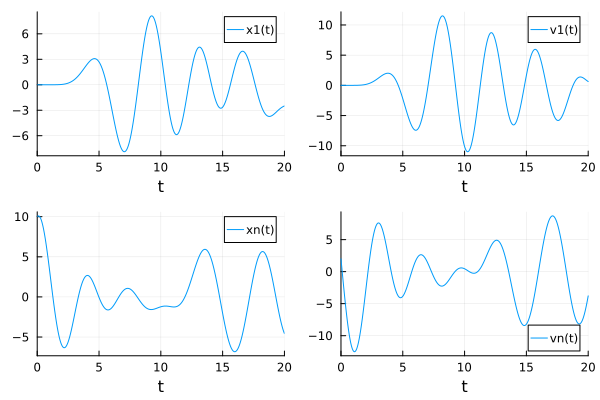

In [15]:
# # Mass
m1 = 1.0
c1 = 1.0
k1 = 1.0

# Dimension
n = 5
# MASS MATRIX
M = m1 * Matrix(I, n, n)
# DAMPING MATRIX
C = c1 * Matrix(I, n, n) * 0
# STIFFNESS MATRIX
K = zeros(n, n)
K[1,1] = k1+k1
K[1,2] = -k1
K[n,n-1] = -k1
K[n,n] = k1+k1
for j in range(2,n-1)
    K[j,j-1:j+1] = [-k1, k1+k1, -k1]
end

function f(t)
    out = zeros(n)
    out[n] = sin(sqrt(2)*t)*0
    return out
end

function NdimProblem(du,u,p,t)
    # Problem: [M]*\ddot {u} + [C] *\dot {u} + [K] * {u} = {f(t)}
    ddu = inv(M) * (-C*du - K*u + f(t))
end

# Initial Conditions
x0 = zeros(n)
x0[n] = 10
v0 = zeros(n)
v0[n] = 2

# # Time parameters
t0 = 0
tf = 20
dt = 0.01
tspan = (t0,tf)               

# SECOND ORDER ODE SOLVER
prob = SecondOrderODEProblem(NdimProblem,v0,x0,tspan)
sol = solve(prob)

# # #..plot the source term
# # tvec = Vector(t0:dt:tf)
# # f1vec = f1.(tvec)
# # f2vec = f1.(tvec)

# # # Excitation plots
# # p_f1 = plot(tvec,f1vec,label="f1(t)")
# # p_f2 = plot(tvec,f2vec,label="f2(t)")

# # # Response plots
px1 = plot(sol,vars=n+1,label="x1(t)")
pv1 = plot(sol,vars=1,label="v1(t)")
pxn = plot(sol,vars=2n,label="xn(t)")
pvn = plot(sol,vars=n,label="vn(t)")

# # # # plot(p_f1,p_f2,p_x1,p_x1,layout=(2,2))
# # # plot(p_x1, p_x2, p_dx1, p_dx2, layout=(2,2))
plot(px1,pv1, pxn,pvn, layout=(2,2))


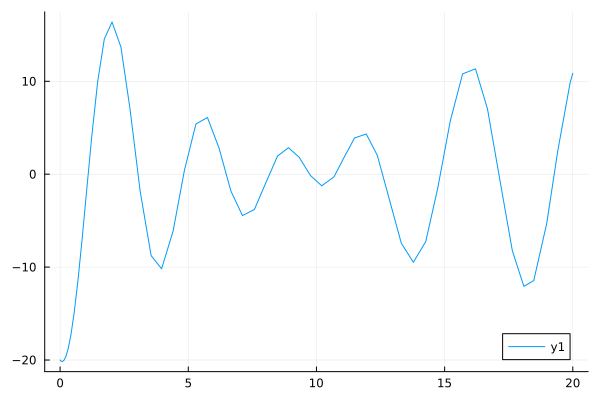

In [16]:
tvec = sol.t
m = length(tvec)
uvec = zeros(m,n)
vvec = zeros(m,n)

for j in range(1,m)
    vvec[j,1:n] = sol.u[j][1:n]
    uvec[j,1:n] = sol.u[j][n+1:2*n]
end

p1 = plot(tvec, uvec[:,1])

avec = zeros(m,n)
idx = 0
for idx in range(1,m)
    t = tvec[idx]
    avec[idx, :] = inv(M) * (f(t) - C*vvec[idx, :] - K*uvec[idx, :])
end

plot(tvec, avec[:,n])


# <font color="red">THREE POINT MASS DOOR</font>

In [17]:
# For maximum displacement and velocity:
function get_UVA(sol,M,C,K)
    tvec = sol.t
    m = length(tvec)            # Time Dimension
    n = Int(length(sol.u[1])/2) # DOF
    uvec = zeros(m,n)
    vvec = zeros(m,n)
    avec = zeros(m,n)

    for j in range(1,m)
        vvec[j,1:n] = sol.u[j][1:n]
        uvec[j,1:n] = sol.u[j][n+1:2*n]
    end
    
    idx = 0
    for idx in range(1,m)
       t = tvec[idx]
        avec[idx, :] = inv(M) * (f(t) - C*vvec[idx, :] - K*uvec[idx, :])
    end
    return uvec, vvec, avec
end

function get_MAXABS(U,V,A)
    n = Int(length(sol.u[1])/2) # DOF
    maxU = zeros(n)
    maxV = zeros(n)
    maxA = zeros(n)
    for k in 1:n
        maxU[k] = maximum(abs.(U[:,k]))
        maxV[k] = maximum(abs.(V[:,k]))
        maxA[k] = maximum(abs.(A[:,k]))
    end
    return maxU, maxV, maxA
end

print("Functions Defined")


Functions Defined

In [18]:
# # Mass
m1 = 12.5
m2 = 5
m3 = 12.5
# Stiffness
k1 = .2e5
k2 = 1e4
k3 = 1e4
k4 = .2e5
# Damping
alpha = .003
c1 = alpha * k1
c2 = alpha * k2
c3 = alpha * k3
c4 = alpha * k4


# Problem Dimension
n = 3
# MASS MATRIX
d = [m1,m2,m3]
M = Matrix(Diagonal(d))
# DAMPING MATRIX
d = [c1+c2, c2+c3, c3+c4]
C = Matrix(Diagonal(d))
C[1,2], C[2,1] = -c2, -c2
C[2,3], C[3,2] = -c3, -c3
# STIFFNESS MATRIX
d = [k1+k2, k2+k3, k3+k4]
K = Matrix(Diagonal(d))
K[1,2], K[2,1] = -k2, -k2
K[2,3], K[3,2] = -k3, -k3


function f(t)
    out = zeros(n)
    out[1] = 200*exp(-(t-0.3)^2/0.01)
    return out
end

function NdimProblem(du,u,p,t)
    # Problem: [M]*\ddot {u} + [C] *\dot {u} + [K] * {u} = {f(t)}
    ddu = inv(M) * (-C*du - K*u + f(t))
end

# Initial Conditions
x0 = zeros(n)
# x0[1] = 1
v0 = zeros(n)

# # Time parameters
t0 = 0
tf = 3
dt = 0.01
tspan = (t0,tf)

# SECOND ORDER ODE SOLVER
prob = SecondOrderODEProblem(NdimProblem,v0,x0,tspan)
sol = solve(prob)

print("Problem Solved")


Problem Solved

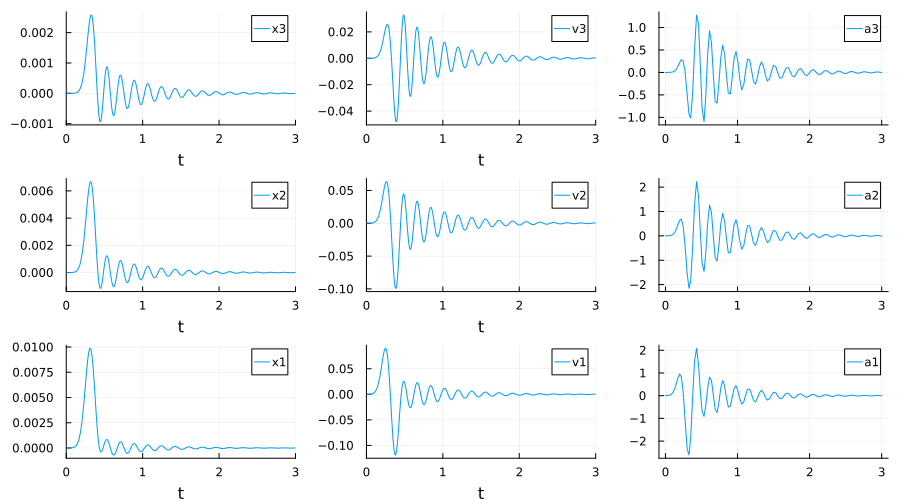

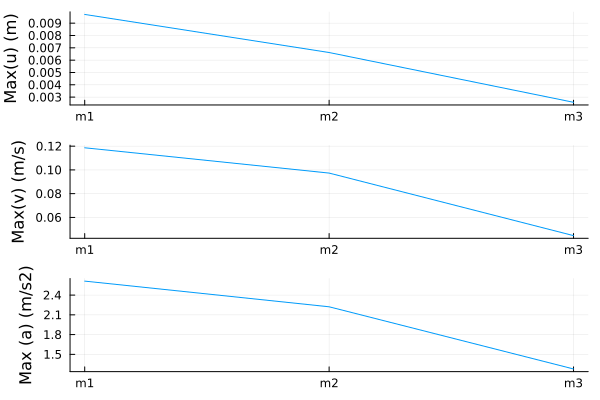

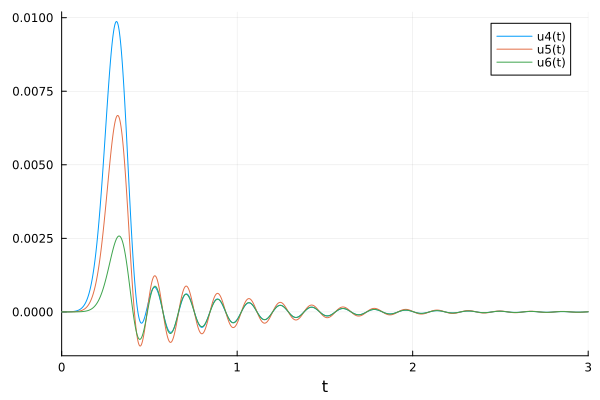

In [19]:
# p = Array{Plots.Plot{Plots.GRBackend},2*n}[]
# for j in range(1,2*n)
    # p[1] = plot(sol,vars=n+1,label="x" * string(j) * "(t)")
# end

px1 = plot(sol, vars=n+1, label="x1")
px2 = plot(sol, vars=n+2, label="x2")
px3 = plot(sol, vars=n+3, label="x3")
pv1 = plot(sol, vars=  1, label="v1")
pv2 = plot(sol, vars=  2, label="v2")
pv3 = plot(sol, vars=  3, label="v3")

U, V, A = get_UVA(sol, M, C, K)
maxU, maxV, maxA = get_MAXABS(U,V,A)
tvec = sol.t
pa1 = plot(tvec, A[:,1], label="a1")
pa2 = plot(tvec, A[:,2], label="a2")
pa3 = plot(tvec, A[:,3], label="a3")

pu = plot([1,2,3],maxU, label="max(abs(x(t)))"); xticks!([1,2,3], ["m1", "m2", "m3"]); plot!(legend=:none)
ylabel!("Max(u) (m)")
pv = plot([1,2,3],maxV, label="max(abs(v(t)))"); xticks!([1,2,3], ["m1", "m2", "m3"]); plot!(legend=:none)
ylabel!("Max(v) (m/s)")
pa = plot([1,2,3],maxA, label="max(abs(a(t)))"); xticks!([1,2,3], ["m1", "m2", "m3"]); plot!(legend=:none)
ylabel!("Max (a) (m/s2)")


# display(plot(px3,pv3, px2,pv2, px1,pv1, layout=(3,2), size=(900,500)))
display(plot(px3,pv3,pa3, px2,pv2,pa2, px1,pv1,pa1, layout=(3,3), size=(900,500)))

display(plot(pu, pv, pa, layout=(3,1)))

# pp = plot(tvec, U[:,1], label="x1(t)")
# plot!(tvec, U[:,2], label="x2(t)")
# plot!(tvec, U[:,3], label="x3(t)")
# display(pp)

display(plot(sol, vars=[4,5,6]))



In [20]:
# DISPLAYING SIMPLE INFORMATION ABOUT THE DYNAMIC PROPERTIES OF THE THREE MASSES
freq = zeros(n)
freq[1] = 1/(2*3.141592) * sqrt((k1+k2)/m1)
freq[2] = 1/(2*3.141592) * sqrt((k2+k3)/m2)
freq[3] = 1/(2*3.141592) * sqrt((k3+k4)/m3)
g = zeros(n)
g[1] = (c1+c2) / (2*sqrt(m1*(k1+k2)))
g[2] = (c2+c3) / (2*sqrt(m2*(k2+k3)))
g[3] = (c3+c4) / (2*sqrt(m3*(k3+k4)))

for i in 1:n
    print("Mass ", i, ": f = ", freq[i], " Hz;  ", "g = ", g[i], ".", "\n")
end

aux = zeros(n,3)
aux[:,1] = maxU
aux[:,2] = maxV
aux[:,3] = maxA
display(Matrix(aux))

3×3 Matrix{Float64}:
 0.00970646  0.118647   2.61257
 0.00661747  0.097334   2.22238
 0.00257959  0.0446369  1.27763

Mass 1: f = 7.7969696344502335 Hz;  g = 0.07348469228349534.
Mass 2: f = 10.065844515036895 Hz;  g = 0.09486832980505137.
Mass 3: f = 7.7969696344502335 Hz;  g = 0.07348469228349534.


Explained [Ideal Impulse Response of an Undamped Second Order System](https://eng.libretexts.org/Bookshelves/Electrical_Engineering/Signal_Processing_and_Modeling/Introduction_to_Linear_Time-Invariant_Dynamic_Systems_for_Students_of_Engineering_(Hallauer)/08%3A_Pulse_Inputs_Dirac_Delta_Function_Impulse_Response_Initial_Value_Theorem_Convolution_Sum/8.07%3A_Ideal_Impulse_Response_of_an_Undamped_Second_Order_System). Notion of transfer function in the Laplace domain. Extension to [Laplace Transform and coupled oscillators](http://physicalmusings.blogspot.com/2012/12/laplace-transform-and-coupled.html)

System of two differential equations for $x(t)$ and $y(t)$. 

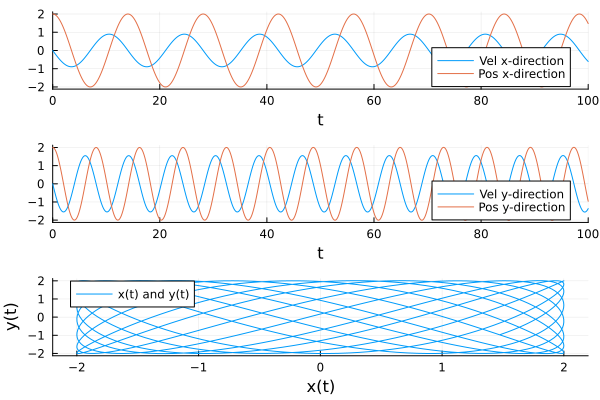

In [21]:
m = 5 
#..set spring constant of spring 
k = 1.0 
#..set damping constant 
c = 0.0 

#..set imposed acceleration on the door 
function f(t)
    #return exp(-(t-2)^2/0.01)
    #return t>=2 
    return 0 
end 

#..define the right-hand side of the ordinary differential equation of the equation of motion 
function mass_system2!(ddu,du,u,p,t)
    # solve \ddot{u} = -(k/m) u - (c/m) \dot u + f(t) 
    ddu[1] = -(k/m)*u[1] + f(t)
    ddu[2] = -(3*k/m)*u[2] + f(t)
end

#..set initial position and velocity
u0 = [2.0, 2.0]                                      
v0 = [0.0, 0.0]
#..set time begin and end forward
tspan = (0.0,100.0)               

#..define ODE problem to be solved  
prob = SecondOrderODEProblem(mass_system2!,v0,u0,tspan)
sol = solve(prob)

#..plot the source term
tvec = Vector(0.:0.01:10.)
fvec = f.(tvec)
# p1 = plot(tvec,fvec,label="Excitation")

#..velocity and position have vars=(1,2) and vars=(3,4), respectively. 
plot(sol,vars=1,label="Vel x-direction") 
p1 = plot!(sol,vars=3,label="Pos x-direction")

plot(sol,vars=2,label="Vel y-direction") 
p2 = plot!(sol,vars=4,label="Pos y-direction")

p3 = plot(sol,vars=(3,4),label="x(t) and y(t)")
xlabel!("x(t)") 
ylabel!("y(t)")

#..plot solution of velocity and position as function of time  
plot(p1,p2,p3,layout=(3,1))

## My modified 2-point system

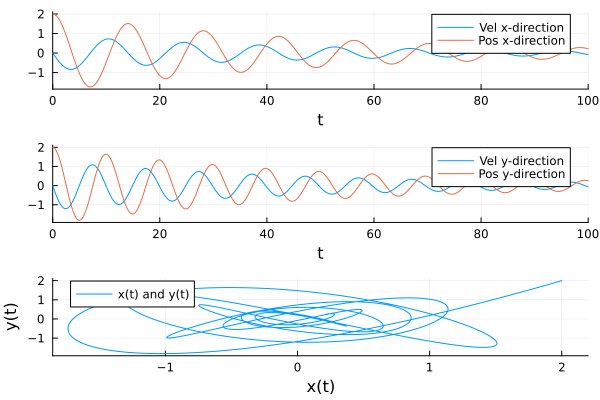

In [22]:
m = 5 
#..set spring constant of spring 
kx = 1.0 
ky = 2.0
#..set damping constant 
cx = 0.2 
cy = 0.2

# External forces:
function fx(t)
    #return exp(-(t-2)^2/0.01)
    #return t>=2 
    return 0 
end
function fy(t)
    #return exp(-(t-2)^2/0.01)
    #return t>=2 
    return 0 
end

#..define the right-hand side of the ordinary differential equation of the equation of motion 
function TwoDimSingleMass(ddu,du,u,p,t)
    # solve \ddot{u} = -(k/m) u - (c/m) \dot u + f(t) 
    ddu[1] = -(kx/m)*u[1] -(cx/m)*du[1] + fx(t)
    ddu[2] = -(ky/m)*u[2] -(cy/m)*du[2] + fy(t)
end

#..set initial position and velocity
u0 = [2.0, 2.0]                                      
v0 = [0.0, 0.0]
#..set time begin and end forward
tspan = (0.0,100.0)               

#..define ODE problem to be solved  
prob = SecondOrderODEProblem(TwoDimSingleMass,v0,u0,tspan)
sol = solve(prob)

#..plot the source term
tvec = Vector(0.:0.01:10.)
fvec = f.(tvec)
# p1 = plot(tvec,fvec,label="Excitation")

#..velocity and position have vars=(1,2) and vars=(3,4), respectively. 
plot(sol,vars=1,label="Vel x-direction") 
p1 = plot!(sol,vars=3,label="Pos x-direction")

plot(sol,vars=2,label="Vel y-direction") 
p2 = plot!(sol,vars=4,label="Pos y-direction")

p3 = plot(sol,vars=(3,4),label="x(t) and y(t)")
xlabel!("x(t)") 
ylabel!("y(t)")

#..plot solution of velocity and position as function of time  
plot(p1,p2,p3,layout=(3,1))

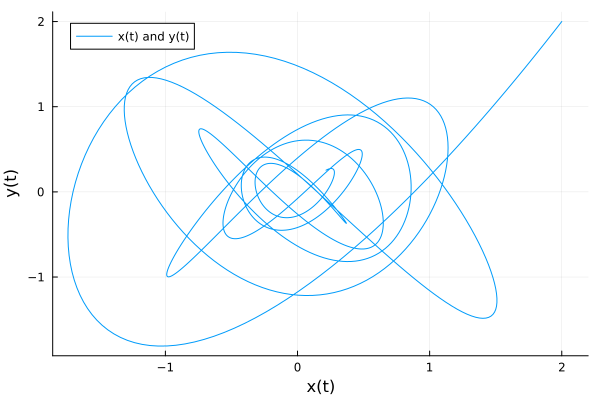

In [23]:
plot(p3)